In [2]:
import pandas as pd

black_friday_sales_FILE_ = 'BlackFridaySales.csv'

bfs_dataFrame = pd.read_csv(black_friday_sales_FILE_)

bfs_dataFrame


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
bfs_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
bfs_dataFrame.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
from sklearn.model_selection import train_test_split

# Select target
y = bfs_dataFrame.Purchase

predictors = bfs_dataFrame.drop(['Purchase'], axis=1)
X = predictors.select_dtypes(exclude=['object'])

# Divide data into training and validation subsets
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_val, y_train, y_val):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return mean_absolute_error(y_val, preds)

In [7]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_val = X_val.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_val, y_train, y_val))

MAE from Approach 1 (Drop columns with missing values):
2111.098160509049


In [8]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_val))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_val.columns

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_val))

MAE from Approach 2 (Imputation):
2226.7799565145788


In [9]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_val.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_val))

MAE from Approach 3 (An Extension to Imputation):
2226.4028217874193


In [94]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(440054, 6)
Product_Category_2    138955
Product_Category_3    306663
dtype: int64


In [10]:
# Assuming your DataFrame is named X_train
X_train = X_train.drop(['Product_Category_2', 'Product_Category_3'], axis=1)

In [11]:
group_data_by_ProductID_count = bfs_dataFrame.groupby('Purchase').sum().sort_index()
group_data_by_ProductID_count

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
Purchase,,,,,,
12,101320764,864,44,1919,0.0,0.0
13,106332492,927,43,2014,0.0,0.0
14,95274345,815,42,1805,0.0,0.0
24,118376594,1069,40,2242,0.0,0.0
25,113337416,911,44,2147,0.0,0.0
...,...,...,...,...,...,...
23956,1005102,12,0,10,15.0,0.0
23958,4014173,8,2,40,52.0,32.0
23959,2005334,13,1,20,13.0,16.0


In [97]:
# Grouping the DataFrame by 'City_Category' and summing the 'Purchase' column
purchase_by_city = bfs_dataFrame.groupby('City_Category')['Purchase'].sum()

# Finding the city category with the highest total purchases
city_with_most_purchases = purchase_by_city.idxmax()

# Getting the total purchases for the city category with the highest purchases
most_purchases_amount = purchase_by_city.max()

print(f"The city category '{city_with_most_purchases}' made the most purchases with a total purchase amount of {most_purchases_amount}.")


The city category 'B' made the most purchases with a total purchase amount of 2115533605.


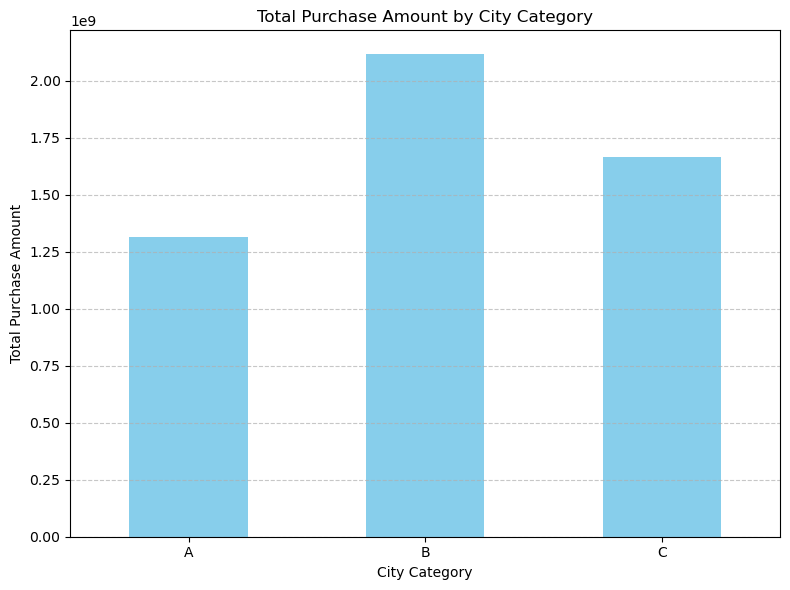

In [98]:
import matplotlib.pyplot as plt

# Grouping the DataFrame by 'City_Category' and summing the 'Purchase' column
purchase_by_city = bfs_dataFrame.groupby('City_Category')['Purchase'].sum()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
purchase_by_city.plot(kind='bar', color='skyblue')
plt.title('Total Purchase Amount by City Category')
plt.xlabel('City Category')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()
plt.show()


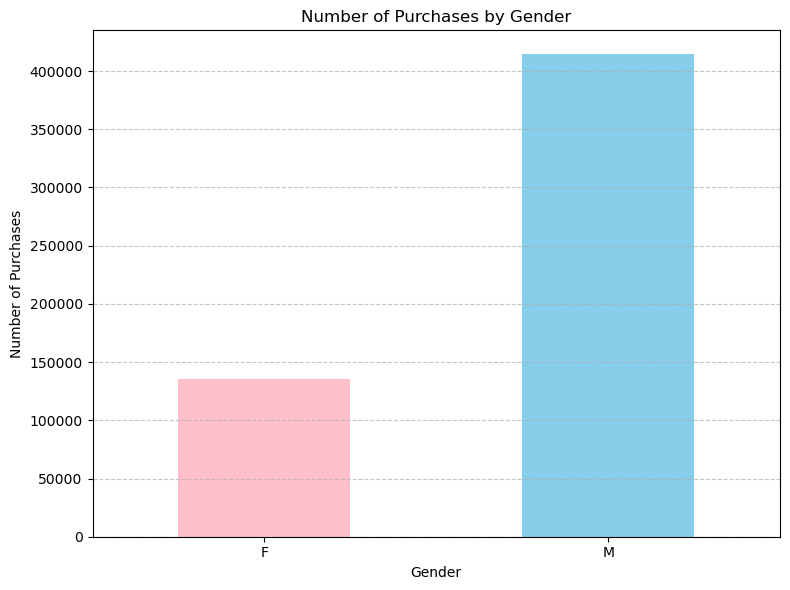

In [105]:
# Grouping the DataFrame by 'Gender' and counting the number of purchases for each gender
purchase_by_gender = bfs_dataFrame.groupby('Gender').size()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
purchase_by_gender.plot(kind='bar', color=['pink', 'skyblue'])
plt.title('Number of Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [100]:
from collections import Counter

# Convert the list to a Counter object to count occurrences of each age group
age_counts = Counter(bfs_dataFrame[('Age')])

# Print the counts of each age group
for age_group, count in age_counts.items():
    print(f"Age group {age_group}: {count} occurrences")


Age group 0-17: 15102 occurrences
Age group 55+: 21504 occurrences
Age group 26-35: 219587 occurrences
Age group 46-50: 45701 occurrences
Age group 51-55: 38501 occurrences
Age group 36-45: 110013 occurrences
Age group 18-25: 99660 occurrences


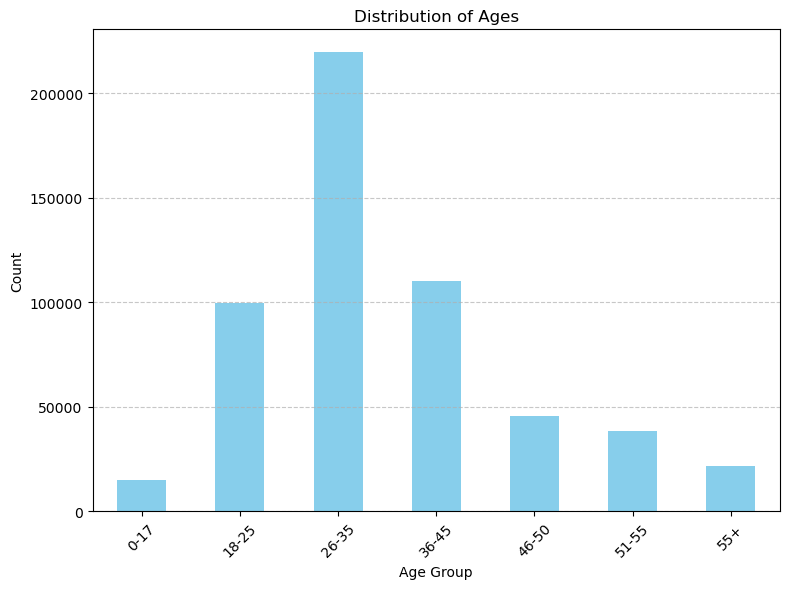

In [101]:
import matplotlib.pyplot as plt

# Convert the list to a pandas Series for easier plotting
age_series = pd.Series(bfs_dataFrame[('Age')])

# Plot a histogram of the ages
plt.figure(figsize=(8, 6))
age_series.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [102]:
# Grouping the DataFrame by both 'Age' and 'Gender' and counting the number of occurrences for each combination
gender_age_counts = bfs_dataFrame.groupby(['Age', 'Gender']).size()

# Printing the counts of each age group and gender combination
print(gender_age_counts)


Age    Gender
0-17   F           5083
       M          10019
18-25  F          24628
       M          75032
26-35  F          50752
       M         168835
36-45  F          27170
       M          82843
46-50  F          13199
       M          32502
51-55  F           9894
       M          28607
55+    F           5083
       M          16421
dtype: int64


<Figure size 1000x600 with 0 Axes>

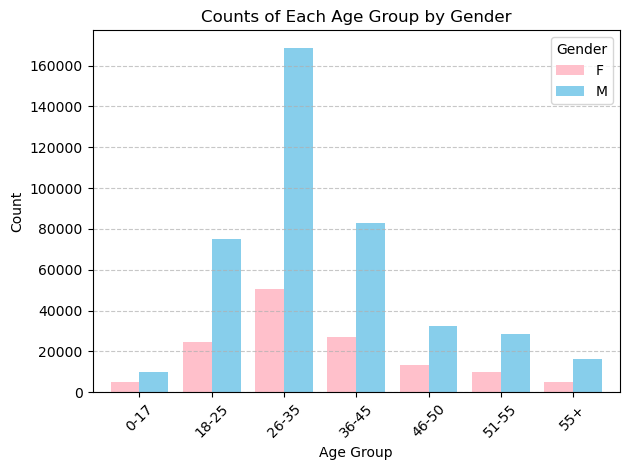

In [104]:
import matplotlib.pyplot as plt

# Grouping the DataFrame by both 'Age' and 'Gender' and counting the number of occurrences for each combination
gender_age_counts = bfs_dataFrame.groupby(['Age', 'Gender']).size().unstack()

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
gender_age_counts.plot(kind='bar', color=['pink', 'skyblue'], width=0.8)
plt.title('Counts of Each Age Group by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [111]:
# Grouping the DataFrame by both 'Age' and 'Gender' and summing the 'Purchase' column for each combination
purchase_by_age_gender = bfs_dataFrame.groupby(['Age', 'Gender'])['Purchase'].sum()

# Printing the sum of purchases for each age group and gender combination
print(purchase_by_age_gender)


Age    Gender
0-17   F           4238.5978
       M           9252.7205
18-25  F          20547.5842
       M          70837.2833
26-35  F          44297.6233
       M         158879.4345
36-45  F          24343.8963
       M          78313.0921
46-50  F          11670.6864
       M          30413.6539
51-55  F           8946.5997
       M          27763.3647
55+    F           4578.2765
       M          15498.4610
Name: Purchase, dtype: float64


   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    0.8370  
1                 6.0                14.0    1.5200  
2                 NaN                 NaN   

<Figure size 1000x600 with 0 Axes>

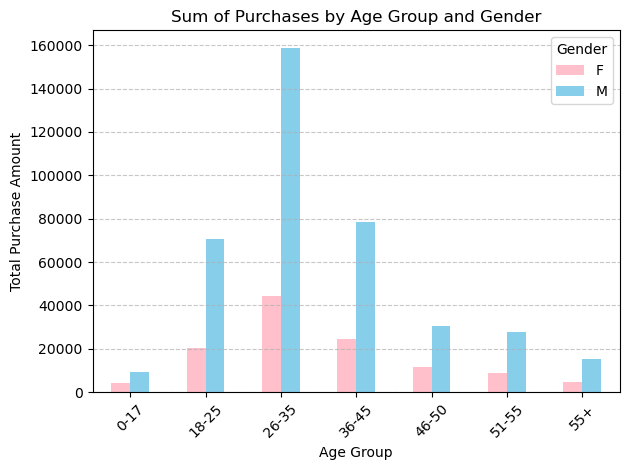

In [110]:
import matplotlib.pyplot as plt

# Convert 'Purchase' column to decimal format
bfs_dataFrame['Purchase'] = bfs_dataFrame['Purchase'] / 100

# Print the DataFrame to verify the conversion
print(bfs_dataFrame.head())

# Grouping the DataFrame by both 'Age' and 'Gender' and summing the 'Purchase' column for each combination
purchase_by_age_gender = bfs_dataFrame.groupby(['Age', 'Gender'])['Purchase'].sum().unstack()

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
purchase_by_age_gender.plot(kind='bar', color=['pink', 'skyblue'])
plt.title('Sum of Purchases by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [129]:
# Filter the DataFrame to include only purchases made by males
male_purchases = bfs_dataFrame[bfs_dataFrame['Gender'] == 'M']

# Count the occurrences of each product purchased by males
male_product_counts = male_purchases['Product_ID'].value_counts()

# Identify the products with the lowest counts (least sold products for males)
least_sold_products_male = male_product_counts[male_product_counts == male_product_counts.min()]

# Print the least sold products for males
print("Least sold products for males:")
print(least_sold_products_male)


Least sold products for males:
P00364542    1
P00062342    1
P00300742    1
P00067442    1
P00063442    1
            ..
P00340742    1
P00306942    1
P00144142    1
P00065542    1
P00203742    1
Name: Product_ID, Length: 160, dtype: int64


In [131]:
# Check for missing values
missing_values = bfs_dataFrame.isnull().sum()
print(missing_values)


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [132]:
# Impute missing values with the mean of each respective column
bfs_dataFrame['Product_Category_2'].fillna(bfs_dataFrame['Product_Category_2'].mean(), inplace=True)
bfs_dataFrame['Product_Category_3'].fillna(bfs_dataFrame['Product_Category_3'].mean(), inplace=True)

# Check if missing values have been handled
missing_values_after_imputation = bfs_dataFrame.isnull().sum()
print(missing_values_after_imputation)


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


In [134]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(bfs_dataFrame, columns=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], drop_first=True)

# Display the first few rows of the encoded dataframe
print(df_encoded.head())


   User_ID Product_ID  Occupation  Marital_Status  Product_Category_1  \
0  1000001  P00069042          10               0                   3   
1  1000001  P00248942          10               0                   1   
2  1000001  P00087842          10               0                  12   
3  1000001  P00085442          10               0                  12   
4  1000002  P00285442          16               0                   8   

   Product_Category_2  Product_Category_3  Purchase  Gender_M  Age_18-25  ...  \
0            9.842329           12.668243    0.8370         0          0  ...   
1            6.000000           14.000000    1.5200         0          0  ...   
2            9.842329           12.668243    0.1422         0          0  ...   
3           14.000000           12.668243    0.1057         0          0  ...   
4            9.842329           12.668243    0.7969         1          0  ...   

   Age_36-45  Age_46-50  Age_51-55  Age_55+  City_Category_B  City_Categor

In [135]:
# Create user-item interaction matrix
user_item_matrix = df_encoded.pivot_table(index='User_ID', columns='Product_ID', values='Purchase', fill_value=0)

# Display the user-item interaction matrix
print(user_item_matrix.head())


Product_ID  P00000142  P00000242  P00000342  P00000442  P00000542  P00000642  \
User_ID                                                                        
1000001         1.365        0.0        0.0        0.0        0.0        0.0   
1000002         0.000        0.0        0.0        0.0        0.0        0.0   
1000003         0.000        0.0        0.0        0.0        0.0        0.0   
1000004         0.000        0.0        0.0        0.0        0.0        0.0   
1000005         0.000        0.0        0.0        0.0        0.0        0.0   

Product_ID  P00000742  P00000842  P00000942  P00001042  ...  P0098942  \
User_ID                                                 ...             
1000001           0.0        0.0        0.0        0.0  ...       0.0   
1000002           0.0        0.0        0.0        0.0  ...       0.0   
1000003           0.0        0.0        0.0        0.0  ...       0.0   
1000004           0.0        0.0        0.0        0.0  ...       0.0   
1

In [136]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between users
user_similarity_matrix = cosine_similarity(user_item_matrix)

# Convert the similarity matrix into a DataFrame for better visualization
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

# Display the user similarity matrix
print("User Similarity Matrix:")
print(user_similarity_df.head())


User Similarity Matrix:
User_ID   1000001   1000002   1000003   1000004   1000005   1000006   1000007  \
User_ID                                                                         
1000001  1.000000  0.022420  0.052275  0.260852  0.141631  0.081421  0.016365   
1000002  0.022420  1.000000  0.123485  0.030775  0.060786  0.084933  0.145114   
1000003  0.052275  0.123485  1.000000  0.104895  0.007618  0.069309  0.057641   
1000004  0.260852  0.030775  0.104895  1.000000  0.029624  0.036026  0.068604   
1000005  0.141631  0.060786  0.007618  0.029624  1.000000  0.034333  0.141153   

User_ID   1000008   1000009   1000010  ...   1006031   1006032   1006033  \
User_ID                                ...                                 
1000001  0.134522  0.235245  0.103021  ...  0.072683  0.089189  0.109942   
1000002  0.154445  0.084236  0.079004  ...  0.019930  0.064210  0.262698   
1000003  0.110637  0.049278  0.112235  ...  0.073777  0.053514  0.174381   
1000004  0.176671  0.123680 

In [146]:
def generate_recommendations(target_user_id, user_similarity_df, user_item_matrix, top_n=5):
    # Find most similar users to the target user
    similar_users = user_similarity_df[target_user_id].sort_values(ascending=False)[1:]
    
    # Get items purchased by similar users but not by the target user
    items_purchased_by_similar_users = user_item_matrix.loc[similar_users.index]
    
    # Filter items not purchased by the target user
    target_user_purchases = user_item_matrix.loc[target_user_id]
    items_not_purchased_by_target_user = items_purchased_by_similar_users.loc[:, ~target_user_purchases.index.isin(target_user_purchases[target_user_purchases != 0].index)]
    
    # Calculate total purchase amount for each item
    item_purchase_amount = items_not_purchased_by_target_user.sum(axis=0)
    
    # Rank items based on total purchase amount
    recommended_items = item_purchase_amount.sort_values(ascending=False).head(top_n)
    
    return recommended_items

# Example: Generate recommendations for a target user with User_ID 1000001
target_user_id = 1000001
recommendations = generate_recommendations(target_user_id, user_similarity_df, user_item_matrix)
print("Top 5 Recommended Products for User", target_user_id)
print(recommendations)


Top 5 Recommended Products for User 1000001
Product_ID
P00110742    2672.2309
P00112142    2421.6006
P00110942    2363.9564
P00237542    2342.5576
P00057642    2310.2780
dtype: float64
